In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data


/Users/i550012/virtualenv/tensorflow1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/i550012/virtualenv/tensorflow1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/i550012/virtualenv/tensorflow1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/i550012/virtualenv/tensorflow1

In [2]:
mnist = input_data.read_data_sets("MNIST_data")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
def display_digit(digit):
    plt.imshow(digit.reshape(28,28), cmap="Greys", interpolation='nearest')

In [4]:
tr_digits, tr_labels = mnist.train.next_batch(20000)
tst_digits, tst_labels = mnist.test.next_batch(5)

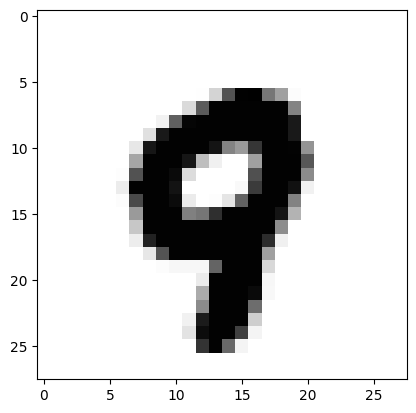

In [5]:
display_digit(tr_digits[42])

In [6]:
def group_by_cluster(predicted_ids, original_entities):
    cluster_groups=[[] for i in range(10)]
    for i in range(len(predicted_ids)):
        cluster_id = predicted_ids[i]
        cluster_groups[cluster_id].append(original_entities[i])
    return cluster_groups

In [7]:
from tensorflow.contrib.learn.python.learn.estimators import kmeans
from tensorflow.contrib.factorization.python.ops import clustering_ops

In [8]:
def input_fn(digits):
    input_t = tf.convert_to_tensor(digits, dtype=tf.float32)
    return (input_t, None)

In [9]:
k_mean_estimator = kmeans.KMeansClustering(num_clusters=10)
fit = k_mean_estimator.fit(input_fn=lambda: input_fn(tr_digits), steps=1000)

Instructions for updating:
Please use tf.contrib.factorization.KMeansClustering instead of tf.contrib.learn.KMeansClustering. It has a similar interface, but uses the tf.estimator.Estimator API instead of tf.contrib.learn.Estimator.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x143a7ecd0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed':

2024-04-11 05:33:10.616436: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/nl/yn0d4tg1107g2jk38nj1hc740000gn/T/tmphtks48y_/model.ckpt.
INFO:tensorflow:loss = 1384859.2, step = 1
INFO:tensorflow:global_step/sec: 15.6549
INFO:tensorflow:loss = 794629.0, step = 101 (6.388 sec)
INFO:tensorflow:global_step/sec: 66.0985
INFO:tensorflow:loss = 793683.44, step = 201 (1.513 sec)
INFO:tensorflow:global_step/sec: 64.7025
INFO:tensorflow:loss = 793284.25, step = 301 (1.546 sec)
INFO:tensorflow:global_step/sec: 66.0295
INFO:tensorflow:loss = 793052.4, step = 401 (1.514 sec)
INFO:tensorflow:global_step/sec: 63.3858
INFO:tensorflow:loss = 792901.94, step = 501 (1.578 sec)
INFO:tensorflow:global_step/sec: 64.1172
INFO:tensorflow:loss = 792792.44, step = 601 (1.560 sec)
INFO:tensorflow:global_step/sec: 63.55
INFO:tensorflow:loss = 792708.7, step = 701 (1.573 sec)
INFO:tensorflow:global_step/sec: 64.7138
INFO:tensorflow:loss = 792643.25,

Instructions for updating:
Please use tf.contrib.factorization.KMeansClustering instead of tf.contrib.learn.KMeansClustering. It has a similar interface, but uses the tf.estimator.Estimator API instead of tf.contrib.learn.Estimator.


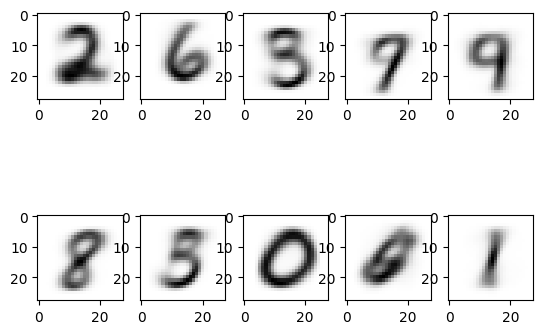

In [10]:
clusters = k_mean_estimator.clusters()
for i in range(10):
    plt.subplot(2,5,i+1)
    display_digit(clusters[i])

In [11]:
cluster_labels = [0,8,3,0,1,2,9,9,3,6]

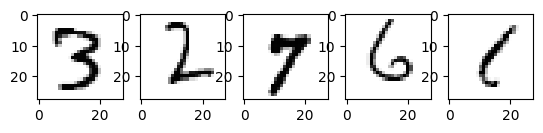

In [12]:
for i in range(5):
    plt.subplot(1,5,i+1)
    display_digit(tst_digits[i])

In [13]:
predict = k_mean_estimator.predict(input_fn=lambda: input_fn(tst_digits), as_iterable=False)
predict

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/nl/yn0d4tg1107g2jk38nj1hc740000gn/T/tmphtks48y_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'all_scores': array([[ 68.50983 ,  89.67316 ,  42.999874,  71.33064 ,  62.11988 ,
          62.97288 ,  51.332886, 100.29912 ,  83.107574,  69.86878 ],
        [ 49.377396,  54.341824,  65.51222 ,  74.29921 ,  72.6859  ,
          68.370834,  61.9375  ,  90.05995 ,  59.434105,  37.143543],
        [ 71.47589 ,  76.05458 ,  74.931564,  33.64155 ,  63.00096 ,
          47.96951 ,  66.993675,  88.94453 ,  56.0177  ,  57.97996 ],
        [ 56.91543 ,  38.473225,  57.16477 ,  59.37478 ,  49.522186,
          77.063614,  62.54617 ,  68.00519 ,  56.876644,  60.951614],
        [ 57.2503  ,  67.48408 ,  50.248756,  55.329388,  53.833214,
          43.90102 ,  47.71221 ,  90.02969 ,  47.205994,  27.558659]],
       dtype=float32),
 'cluster_idx': array([2, 9, 3, 1, 9])}

[3, 6, 0, 8, 6]


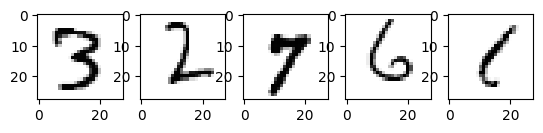

In [14]:
print([cluster_labels[i] for i in predict['cluster_idx']])
for i in range(5):
    plt.subplot(1,5, i+1)
    display_digit(tst_digits[i])

In [15]:
tr_labels[:5]

array([7, 0, 0, 2, 1], dtype=uint8)

In [16]:
predict_train = k_mean_estimator.predict(input_fn=lambda: input_fn(tr_digits), as_iterable=False)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nl/yn0d4tg1107g2jk38nj1hc740000gn/T/tmphtks48y_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [17]:
def display_accuracy(cluster_labels, cluster_idx, actual_labels):
    predict_labels = [cluster_labels[i] in cluster_idx]
    num_accurate_predictions = (list(predict_labels==actual_labels)).count(True)
    print('nAccuratePredictions: ',num_accurate_predictions)
    pctAccuracy=float(num_accurate_predictions)/ float(len(actual_labels))
    print('%AccuracyPredictions: ', pctAccuracy)

In [18]:
display_accuracy(cluster_labels, predict_train['cluster_idx'], tr_labels)

nAccuratePredictions:  2216
%AccuracyPredictions:  0.1108


In [19]:
def display_cluster_mean_std_dev(tr_cl_id, tr_labels):
    cluster_group_labels = group_by_cluster(tr_cl_id,tr_labels)
    mean = [[] for i in range(10)]
    std = [[] for i in range(10)]
    for i in range(10):
        mean[i] = np.mean(cluster_group_labels[i])
        std[i] = np.std(cluster_group_labels[i])
    print('mean: ', mean)
    print('std: ', std)

In [20]:
display_cluster_mean_std_dev(predict_train['cluster_idx'], tr_labels )

mean:  [2.287425149700599, 5.66507747318236, 4.456910569105691, 6.928955866523143, 6.3469026548672565, 6.690104166666667, 3.7536865101037686, 0.361328125, 4.0131736526946105, 2.337618403247632]
std:  [1.1332048580841225, 1.248067287715437, 2.2422192343709715, 1.8089532604968575, 2.287483093277052, 2.4123285754258212, 1.9633330002115574, 1.474713710436928, 2.2826749435669664, 2.407915512543506]


In [21]:
from scipy import stats
def get_cluster_mode(trining_cluster_ids, training_labels):
    cluster_group = group_by_cluster(trining_cluster_ids, training_labels)
    mode = [[] for i in range(10)]
    for i in range(10):
        mode[i] = stats.mode(cluster_group[i])[0][0]
    return mode

In [22]:
mode_labels=get_cluster_mode(predict_train['cluster_idx'], tr_labels)
print(cluster_labels)
print(mode_labels)

[0, 8, 3, 0, 1, 2, 9, 9, 3, 6]
[2, 6, 3, 7, 4, 8, 3, 0, 5, 1]


In [23]:
display_accuracy(mode_labels, predict_train['cluster_idx'], tr_labels)

nAccuratePredictions:  2216
%AccuracyPredictions:  0.1108
